# Python Project: Descriptive Analysis on College Professors

## SDS348 Spring 2021

### Lupita Navarro || LGN282

In [52]:
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np

*For my python project, I chose to reuse the data "Salaries," which I found and used in R for Project 2. This dataset consists of consists of 397 observations collected in 2008/09 of the wages of Professors in the U.S., and includes 6  variables: rank (Assistant Professor, Associate Professor, or Professor), discipline ("A" if they teach theoritical departments; "B" for applied departments), yrs.since.phd (years sinxe PhD), yrs.service (years of service), sex (male or female), and salary (nine-month salary, in dollars).* 

In [35]:
# Import dataset
salaries = sns.load_dataset('salaries')

In [38]:
# peek data set and data info
salaries.head()
salaries.info()


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
Unnamed: 0       397 non-null int64
rank             397 non-null object
discipline       397 non-null object
yrs.since.phd    397 non-null int64
yrs.service      397 non-null int64
sex              397 non-null object
salary           397 non-null int64
dtypes: int64(4), object(3)
memory usage: 21.8+ KB


## Descriptive Stats

In [39]:
# descriptive stats for all numeric variables
salaries.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


*The average salary recieved by college professors was about $113,706.46 (in U.S. currency).*

In [56]:
# counts for categorical variable, sex
salaries['sex'].value_counts()

# counts for categorical variable, discipline
salaries['discipline']. value_counts()

# counts for categorical variable, discipline
salaries['rank']. value_counts()


Male      358
Female     39
Name: sex, dtype: int64

B    216
A    181
Name: discipline, dtype: int64

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

*In this dataset, the observations were taken from 358 male professors and only 39 female professsors. 216 of these professors taught discipline B, applied departments, and 181 taught discipline A, theoritical departments. 266 are Professors, 67 Assistant professors, and 64 Asssociate professors.*

## EDA

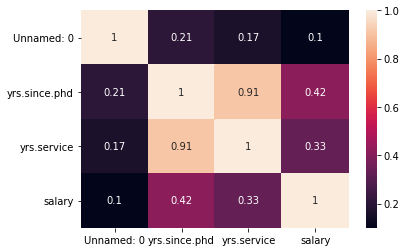

In [44]:
# correlation matrix heatmap of all numeric variables
sns.heatmap(salaries.corr(), annot = True)


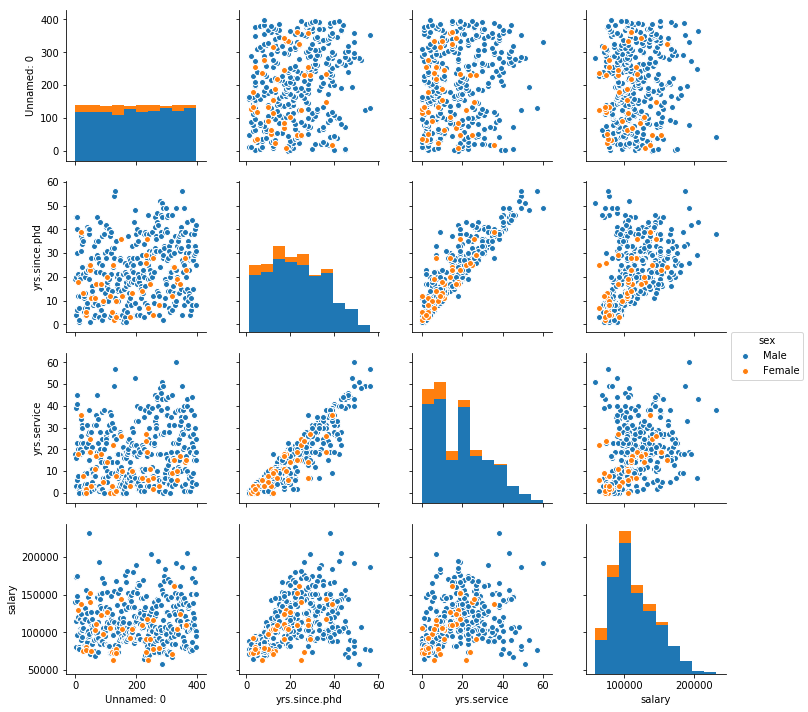

In [43]:
# univariate and bivariate plots to explore each numeric variable across sex
sns.pairplot(data = salaries[list], 
             hue = "sex")

*The correlation matrix heatmap made it easier to see that the only strong relationship between all numeric variables is between years since PhD and years of service, which rendered a correlation coefficient= 0.91. The correlation coefficient between years since PhD and salary, 0.42, shows a medium/weak relationship between the two, while the correlation coefficient between years of service and salary, 0.33, shows that the relationship between the 2 variables is weak/low.*

*The univariate and bivariate plots, which explored all numeric variables across sex, also showed the same significant relationship between years since PhD and years of service, while also failing to demonstrate significant correlation between gender and most numeric variables.*

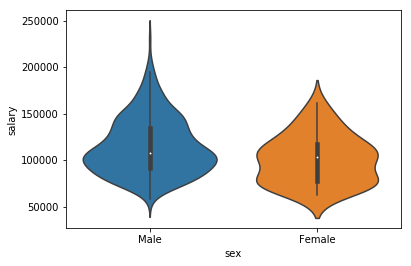

In [60]:
# voilin plot for salary by sex
sns.violinplot(data = salaries, x = "sex", y = "salary")


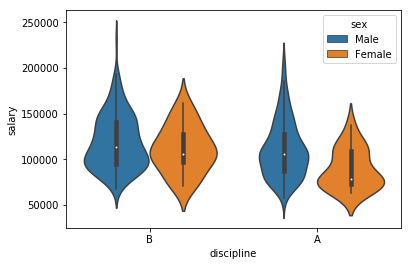

In [41]:
# voilin plot for salary by discipline and sex
sns.violinplot(y = 'salary', x = 'discipline', 
                 data = salaries, 
                 hue = 'sex')

In [61]:
import scipy.stats as stats
stats.ttest_ind(salaries['salary'][salaries['sex'] == 'Male'],
                salaries['salary'][salaries['sex'] == 'Female'])

Ttest_indResult(statistic=2.781674064262432, pvalue=0.005667106519338681)

*A quick voilin plot demonstrated that there appears to be a slight relationship between sex and salary, and possibly some correlation between the interaction of sex and discipline on salary. Assuming all assumptions were met, I ran a quick t-test and concluded that salary is significantly different across genders (p-value<0.05). Despite this significant result, it is important to note that the data could be affected due to the difference in couts/observations collected for each gender, as noted above.*